#Jonathan Halverson
#Tuesday, February 16, 2016

# Combinatorics: How many permutations of PEPPER?

### We begin by finding the answer by writing a short program:

In [35]:
from random import shuffle

s = set([])
w = ['P', 'E', 'P', 'P', 'E', 'R']
N = len(letters)
for a in range(N):
    for b in range(N):
        if (b != a):
            for c in range(N):
                if ((c != a) and (c != b)):
                    for d in range(N):
                        if ((d != a) and (d != b) and (d != c)):
                            for e in range(N):
                                if ((e != a) and (e != b) and (e != c) and (e != d)):
                                    for f in range(N):
                                        if ((f != a) and (f != b) and (f != c) and (f != d) and (f != e)):                                
                                            word = w[a] + w[b] + w[c] + w[d] + w[d] + w[e] + w[f]
                                            s.add(word)

print len(s)

60


###For the analytical solution we recognize that there are 6 choices for the first, 5 for the second and so on. But the 'P' and 'E' characters are indistinguishable so this must be taken into account:

In [36]:
from math import factorial

factorial(6) / (factorial(3) * factorial(2))

60

#Negative binomial distribution 

### If the probability Brian kicks a 35 yard field goal is p = 0.8, what is the probability it takes Brian exactly six tries to get his fourth successful kick? Note that the negative binomial distribution is a generalized version of the geometric distribution.

###We begin with the numerical simulation: 

In [37]:
success = 0
p = 0.8
trials = 1000000
for _ in xrange(trials):
    kicks = [0, 0, 0, 0, 0, 0]
    for i in xrange(6):
        if (random.random() < p): kicks[i] = 1
    if (sum(kicks) == 4 and kicks[-1] == 1): success += 1
print float(success) / trials

0.163094


###The analytical solution to this problem is given by the negative binomial distribution, which is given by nbinom.pmf(k) = choose(k+n-1, n-1) * p**n * (1-p)**k: 

In [38]:
from scipy.stats import nbinom

In [60]:
nbinom.pmf(k=2, n=4, p=0.8)

0.16383999999999996

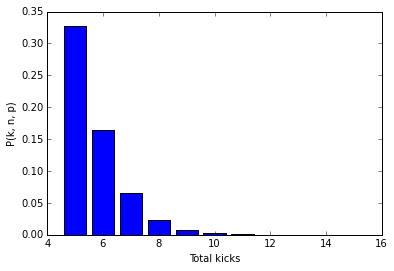

In [72]:
import matplotlib.pyplot as plt
%matplotlib inline
num_successes = 4
kn = map(lambda u: u + num_successes, range(1, 11))
plt.bar(kn, [nbinom.pmf(k=num_fails, n=num_successes, p=0.8) for num_fails in range(1, 11)], align='center')
plt.xlabel('Total kicks')
plt.ylabel('P(k, n, p)')

###Note that some textbooks define the distribution using different exponents so exercise caution. For instance, in the above, n is the number of successes and k is the number of fails.